## Assignment # 3 - Independent Component Analysis

### Name:       Hafiz Arslan Khalid
#### Roll no #   20013122-013

Samples I am using are:
* [sample_1.wav](./Samples/sample_1.wav)
* [sample_2.wav](./Samples/sample_2.wav)

In [1]:
# importing all the required libraries
import numpy as np
import wave                                 # To open audio files
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from scipy.io import wavfile                # to export the result files

In [2]:
track_1 = wave.open('./Samples/sample_1.wav', 'r')
track_2 = wave.open('./Samples/sample_2.wav', 'r')

In [3]:
track_1.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=48000, nframes=203776, comptype='NONE', compname='not compressed')

In [4]:
track_2.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=48000, nframes=203776, comptype='NONE', compname='not compressed')

#### Both tracks have:
- Framerate: 48000
- Total Frames: 203776
- Channels: 1


In [5]:
# length of samples:
framerate = 48000
total_frames = 203776

print(f"Track time in seconds: {total_frames/framerate}")

Track time in seconds: 4.245333333333333


## Extracting each framerate from tracks

In [6]:
_, signal_1 = wavfile.read('./Samples/sample_1.wav')
_, signal_2 = wavfile.read('./Samples/sample_2.wav')

In [7]:
print("shape of signal 1: ", signal_1.shape)
print("shape of signal 2: ", signal_2.shape)

print()
print("First 10 values of signal 1:")
print(signal_1[:10])
print()
print("First 10 values of signal 2:")
print(signal_2[:10])

shape of signal 1:  (203776,)
shape of signal 2:  (203776,)

First 10 values of signal 1:
[ 281  490  534  650  739  810  913  989 1078 1167]

First 10 values of signal 2:
[1223 2014 2134 2582 2890 3163 3526 3790 4117 4434]


## Plotting each signal

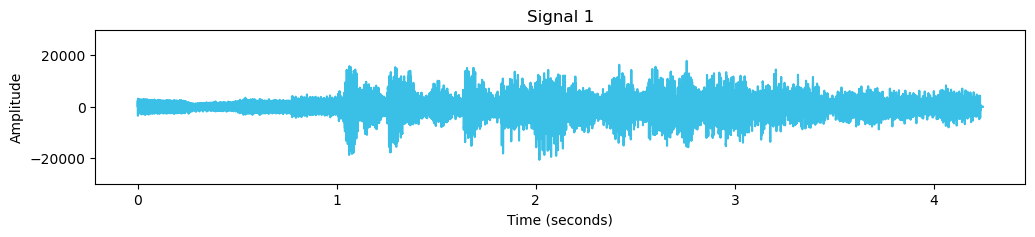

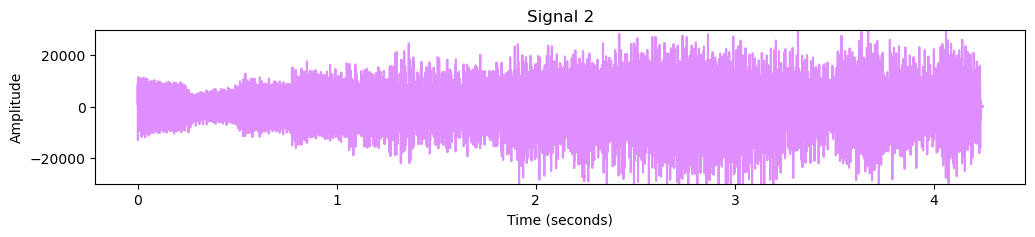

In [8]:
fs = track_1.getframerate()
timing = np.linspace(0, len(signal_1)/fs, len(signal_1))

plt.figure(figsize=(12, 2))
plt.title("Signal 1")
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.plot(timing, signal_1, c='#3ABFE7')
plt.ylim(-30000, 30000)
plt.show()

plt.figure(figsize=(12, 2))
plt.title("Signal 2")
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.plot(timing, signal_2, c='#df8efd')
plt.ylim(-30000, 30000)
plt.show()

## Zipping signals together

In [9]:
X = list(zip(signal_1, signal_2))

X[:10]

[(281, 1223),
 (490, 2014),
 (534, 2134),
 (650, 2582),
 (739, 2890),
 (810, 3163),
 (913, 3526),
 (989, 3790),
 (1078, 4117),
 (1167, 4434)]

## Model

In [10]:
ica = FastICA(n_components=2)

results = ica.fit_transform(X)

In [11]:
result_signal_1 = results[:, 0]
result_signal_2 = results[:, 1]

## Plotting the result signals

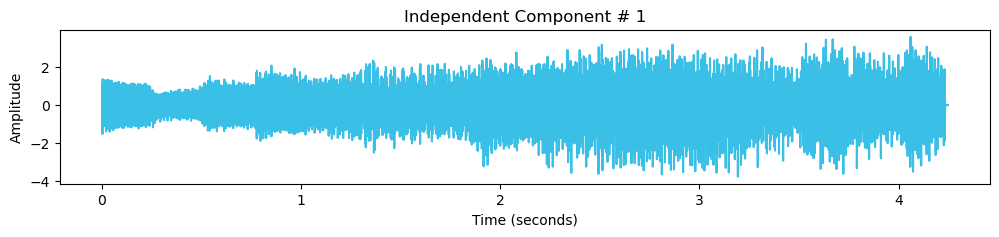

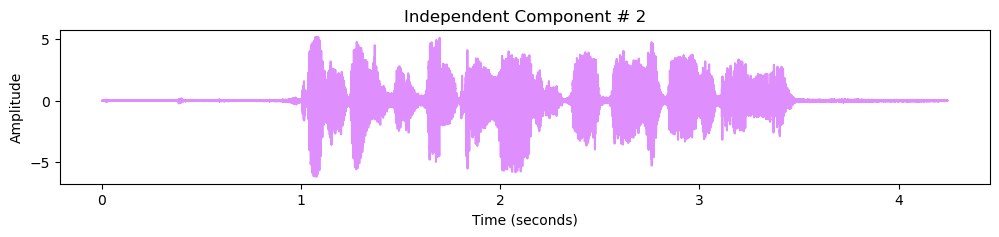

In [12]:
plt.figure(figsize=(12, 2))
plt.title("Independent Component # 1")
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.plot(timing, result_signal_1, c='#3ABFE7')
plt.show()

plt.figure(figsize=(12, 2))
plt.title("Independent Component # 2")
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.plot(timing, result_signal_2, c='#df8efd')
plt.show()

### Saving the results:

In [13]:
#Convert to int, map the appropriate range, and increase the volume a little bit
scaling_factor = 32767 / 5.0
result_signal_1_int = np.int16(result_signal_1 * scaling_factor)
result_signal_2_int = np.int16(result_signal_2 * scaling_factor)



# Write wave files
wavfile.write("./Results/Independent_Conponenet_1.wav", fs, result_signal_1_int)
wavfile.write("./Results/Independent_Componenet_2.wav", fs, result_signal_2_int)

The resulting files we have now are:
* [Independent_Conponenet_1.wav](./Results/Independent_Conponenet_1.wav)
* [Independent_Componenet_2.wav](./Results/Independent_Componenet_2.wav)